In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob

In [2]:
DATA = Path('Datasample/*/')

In [3]:
csvs = glob(str(DATA)+'/2*/*/*.csv')

In [4]:
len(csvs), csvs[:5]

(14159,
 ['Datasample/07/24/09/Scadadata_2018-07-24_09-30-00.csv',
  'Datasample/07/24/09/scadadata.csv',
  'Datasample/07/23/14/Scadadata_2018-07-23_14-03-00.csv',
  'Datasample/07/23/14/scadadata.csv',
  'Datasample/07/23/13/Scadadata_2018-07-23_13-37-00.csv'])

In [5]:
host1 = 'AS01'
host2 = 'AS02'
host3 = 'AS03'
host4 = 'AS04'
host5 = 'AS05'
host6 = 'AS06'
host7 = 'AS07'
host8 = 'AS08'
host9 = 'AS09'
host10 = 'AS10'
host11 = 'AS11'
host12 = 'AS12'
host13 = 'DN_A'
host14 = 'DN_V'

In [16]:
def extract_host(host_name):
    dfs = []
    for csv in csvs:
        current_df = pd.read_csv(csv, sep=';')
        current_df = current_df.loc[current_df.Host == host_name]
        dfs.append(current_df)
    df1 = pd.concat(dfs)
    df = df1.drop(columns=['Time.1'])
    
    return df

In [22]:
def extract_unit(csv, unit):
    dfs = []
    current_df = csv
    current_df = current_df.loc[current_df.Unit == unit]
    dfs.append(current_df)
    df = pd.concat(dfs)
    
    return df

In [35]:
def plot_flow(df, title):
    ax = df.plot(figsize=(20,7))
    ax.set_xlabel('Time')
    ax.set_ylabel('Flow in m3/h')
    ax.set_title(title)
    plt.style.use('seaborn-paper')
    plt.show()

In [36]:
def extract_subs(csv, subs_name):
    dfs = []
    current_df = csv
    current_df = current_df.loc[current_df.Subst == subs_name]
    dfs.append(current_df)
    df = pd.concat(dfs)
    
    return df

In [7]:
df_host1 = extract_host(host1)

In [8]:
df_host1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828741 entries, 65 to 0
Data columns (total 7 columns):
Tag            object
Time           object
Value          float64
Host           object
Subst          object
Description    object
Unit           object
dtypes: float64(1), object(6)
memory usage: 660.9+ MB


In [9]:
df_host1.Time = pd.to_datetime(df_host1.Time)

In [10]:
df_host1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828741 entries, 65 to 0
Data columns (total 7 columns):
Tag            object
Time           datetime64[ns]
Value          float64
Host           object
Subst          object
Description    object
Unit           object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 660.9+ MB


In [11]:
df_host1.set_index('Time', inplace=True)

In [12]:
df_host1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10828741 entries, 2018-10-24 07:57:00 to 2018-05-24 09:53:00
Data columns (total 6 columns):
Tag            object
Value          float64
Host           object
Subst          object
Description    object
Unit           object
dtypes: float64(1), object(5)
memory usage: 578.3+ MB


In [13]:
df_host1['2018-10'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10828740 entries, 2018-10-24 07:57:00 to 2018-10-22 22:26:00
Data columns (total 6 columns):
Tag            object
Value          float64
Host           object
Subst          object
Description    object
Unit           object
dtypes: float64(1), object(5)
memory usage: 578.3+ MB


In [14]:
df_host1_1week = df_host1['2018-10-20':'2018-10-27']

In [15]:
df_host1_1hour = df_host1['2018-10-20 07:00:00':'2018-10-20 08:00:00']

In [19]:
df_host1.head()

,Tag,Value,Host,Subst,Description,Unit
Time,,,,,,
2018-10-24 07:57:00,1201_8001_00.PD,20.821,AS01,U2A1,Padrag regulator Laegdene,%
2018-10-24 07:57:00,1201_8001_01,29.521,AS01,U2A1,Motorstrom pumpe 1 Laegdene,A
2018-10-24 07:57:00,1201_8001_01.PD,83.284,AS01,U2A1,Padrag pumpe 1 Laegdene,%
2018-10-24 07:57:00,1201_8001_02,1.369,AS01,U2A1,Motorstrom pumpe 2 Laegdene,A
2018-10-24 07:57:00,1201_8001_02.PD,0.000,AS01,U2A1,Padrag pumpe 2 Laegdene,%


In [20]:
df_host1.Unit.unique()

array(['%', 'A', 'kote', 'm', 'Bar', 'm3/t', 'Gr.C', 'mVs', 'Kote', 'kW',
       'kVAr', 'kWh', 'kVA', 'CosF', 'V', 'Amp', 'Hz', 'mm/s', 'VDC',
       'grdC', 'bar', 'rpm', 'sek', 'moh', 'dgc', 'HZ', 'kvar', 'kva',
       'pH', 'grC', 'NTU', 'mg/l', 'Hazen', 'Ph', 'csx', 'gr.C', 'l/sek.',
       'mvs', 'kg', 'Kg', 'kg/t', 'Vol%', 'l/t', 'liter', 'm3', 'mbar',
       'W/m2', 'w/m2', 'noe', 'rndm', 'Ws/m2', 'm/s', 'deg.M', 'mm',
       'mm/t', 'cm', ' ', nan, 'l/s', 'Nm', 'PH', 'Nr', '% H20', 'kw',
       'VOL%', 'g/m3', 'l', 'nn', '%RH', 'HHMM', 'min', 'ant', 'grd'],
      dtype=object)

In [24]:
df_host1_1week_flow = extract_unit(df_host1_1week, 'm3/t')

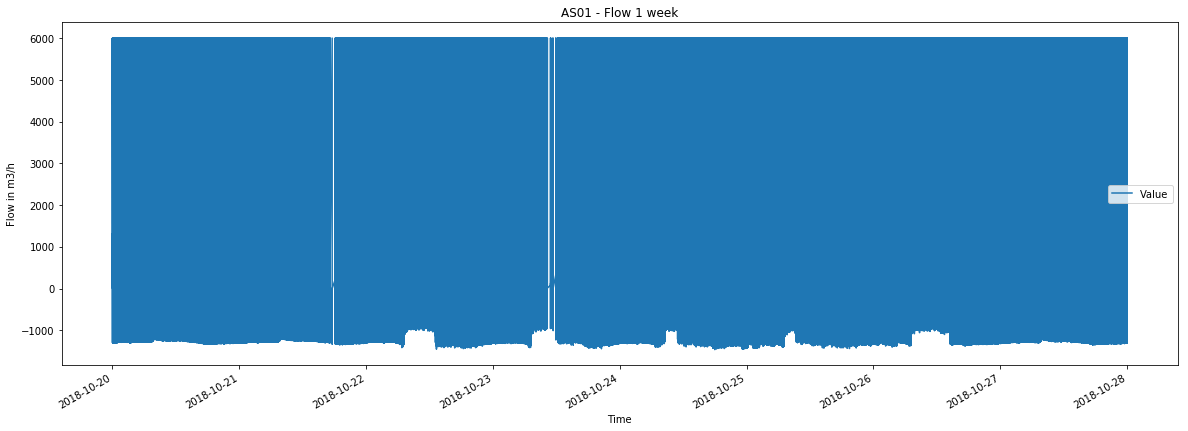

In [25]:
plot_flow(df_host1_1week_flow, 'AS01 - Flow 1 week')

In [32]:
df_host1_1week_flow.Value.mean()

367.2592071217274

In [33]:
df_host1_1week_flow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1111163 entries, 2018-10-24 07:57:00 to 2018-10-22 22:26:00
Data columns (total 6 columns):
Tag            1111163 non-null object
Value          1111163 non-null float64
Host           1111163 non-null object
Subst          1111163 non-null object
Description    1111163 non-null object
Unit           1111163 non-null object
dtypes: float64(1), object(5)
memory usage: 59.3+ MB


In [29]:
df_host1_1Hour_flow = extract_unit(df_host1_1hour, 'm3/t')

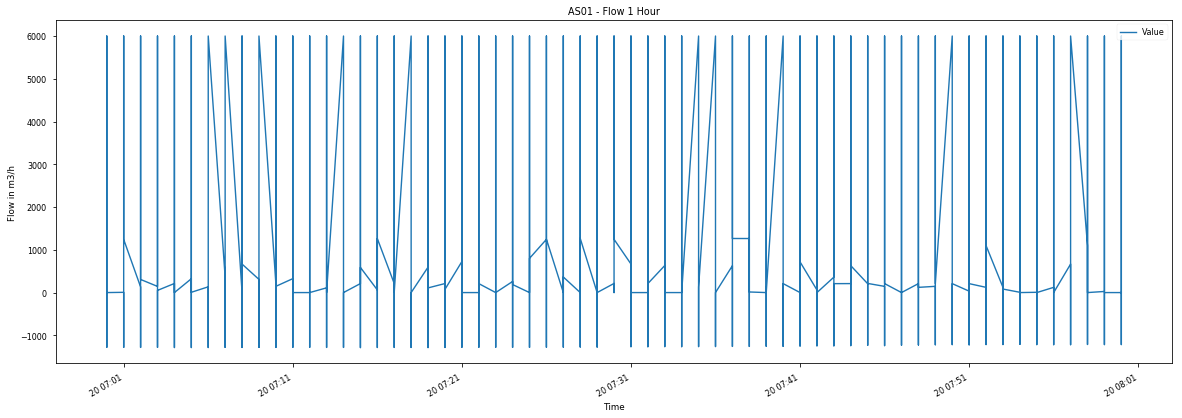

In [30]:
plot_flow(df_host1_1Hour_flow, 'AS01 - Flow 1 Hour')

In [31]:
df_host1_1Hour_flow.Value.mean()

353.745734772423

In [34]:
df_host1_1Hour_flow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5976 entries, 2018-10-20 07:54:00 to 2018-10-20 08:00:00
Data columns (total 6 columns):
Tag            5976 non-null object
Value          5976 non-null float64
Host           5976 non-null object
Subst          5976 non-null object
Description    5976 non-null object
Unit           5976 non-null object
dtypes: float64(1), object(5)
memory usage: 326.8+ KB


In [37]:
df_host1.Subst.unique()

array(['U2A1', 'RAPP', 'U4A1', 'U7A1', 'U5A1', 'U6A1', 'U3A1', 'ESPE',
       'SPA1'], dtype=object)

In [38]:
df_host1_U2A1_week = extract_subs(df_host1_1week_flow, 'U2A1')

In [39]:
df_host1_U2A1_week.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 386934 entries, 2018-10-24 07:57:00 to 2018-10-22 22:26:00
Data columns (total 6 columns):
Tag            386934 non-null object
Value          386934 non-null float64
Host           386934 non-null object
Subst          386934 non-null object
Description    386934 non-null object
Unit           386934 non-null object
dtypes: float64(1), object(5)
memory usage: 20.7+ MB


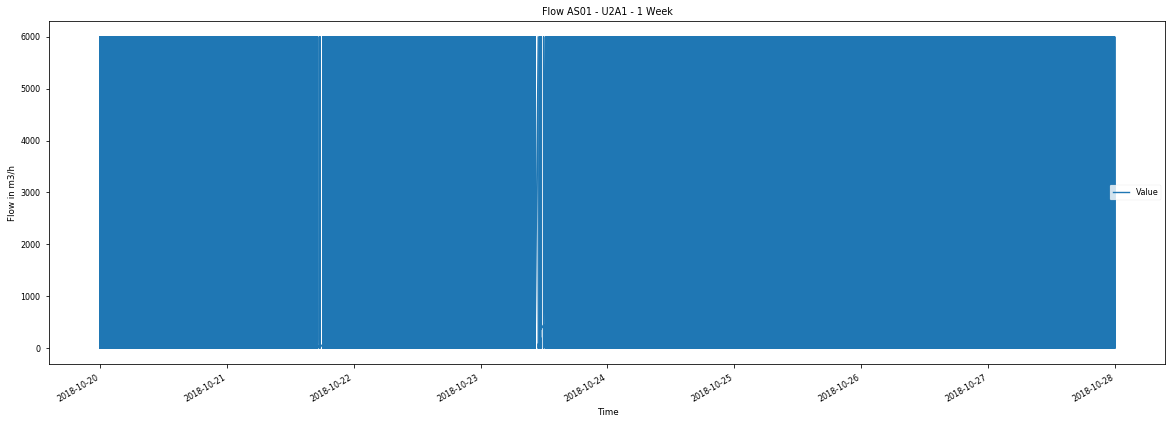

In [40]:
plot_flow(df_host1_U2A1_week, 'Flow AS01 - U2A1 - 1 Week')

In [61]:
df_host1_U2A1_1Hour = extract_subs(df_host1_1Hour_flow, 'U2A1')

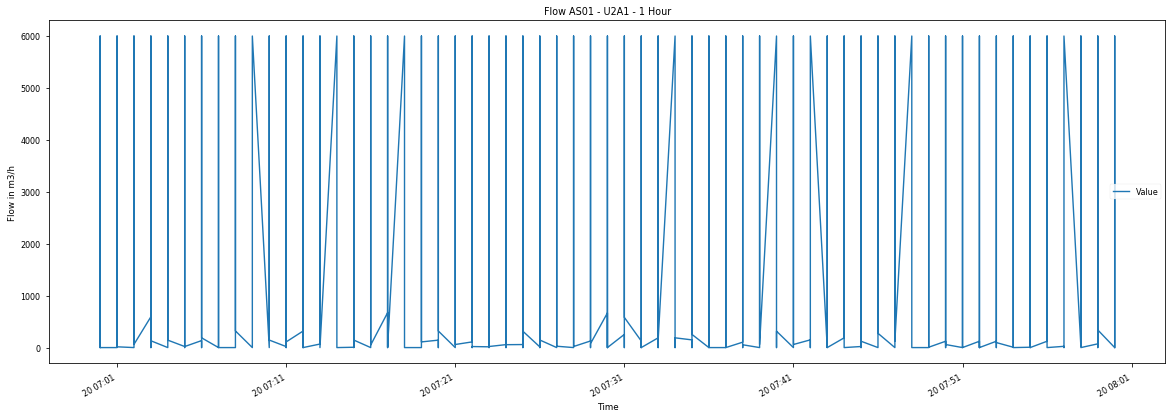

In [62]:
plot_flow(df_host1_U2A1_1Hour, 'Flow AS01 - U2A1 - 1 Hour')

In [63]:
df_host1_U2A1_1Hour.Value.mean()

297.3371481127568

In [64]:
df_host1_1min = df_host1['2018-10-20 07:00:00':'2018-10-20 07:01:00']

In [65]:
df_host1_1min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1536 entries, 2018-10-20 07:01:00 to 2018-10-20 07:00:00
Data columns (total 6 columns):
Tag            1536 non-null object
Value          1536 non-null float64
Host           1536 non-null object
Subst          1536 non-null object
Description    1464 non-null object
Unit           1464 non-null object
dtypes: float64(1), object(5)
memory usage: 84.0+ KB


In [67]:
df_host1_1min_flow = extract_unit(df_host1_1min, 'm3/t')

In [68]:
df_host1_1min_flow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 2018-10-20 07:01:00 to 2018-10-20 07:00:00
Data columns (total 6 columns):
Tag            194 non-null object
Value          194 non-null float64
Host           194 non-null object
Subst          194 non-null object
Description    194 non-null object
Unit           194 non-null object
dtypes: float64(1), object(5)
memory usage: 10.6+ KB


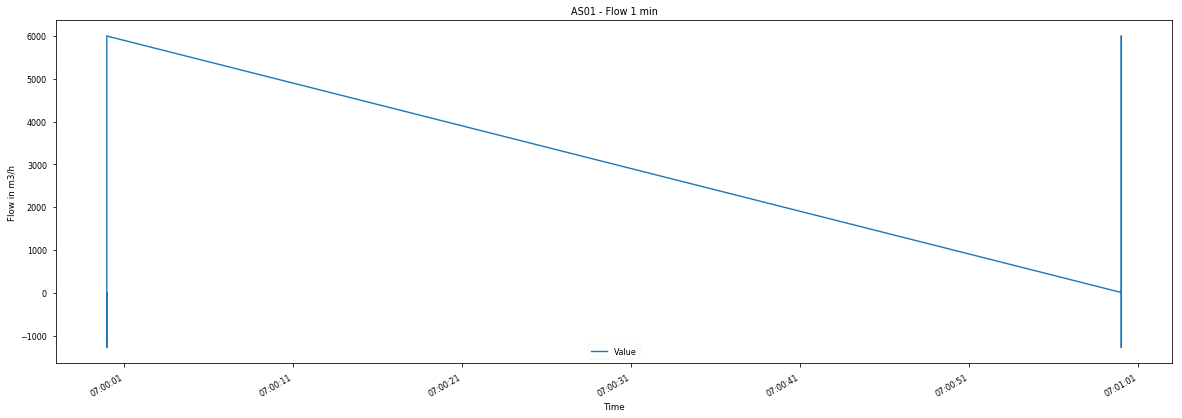

In [69]:
plot_flow(df_host1_1min_flow, 'AS01 - Flow 1 min')

In [70]:
df_host1_1min_flow.Value.mean()

355.86821134020613